In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

In [2]:
house_df = sqlContext.read.format('csv').options(header='true', inferschema='true').load('hdfs://nameservice1/user/arnavmoutl12edu/module8/boston.csv')
house_df.take(1)

[Row(CRIM=0.00632, ZN=18.0, INDUS=2.309999943, CHAS=0, NOX=0.537999988, RM=6.574999809, AGE=65.19999695, DIS=4.090000153, RAD=1, TAX=296, PT=15.30000019, B=396.8999939, LSTAT=4.980000019, MV=24.0)]

In [3]:
house_df.cache()
house_df.printSchema()

root
 |-- CRIM: double (nullable = true)
 |-- ZN: double (nullable = true)
 |-- INDUS: double (nullable = true)
 |-- CHAS: integer (nullable = true)
 |-- NOX: double (nullable = true)
 |-- RM: double (nullable = true)
 |-- AGE: double (nullable = true)
 |-- DIS: double (nullable = true)
 |-- RAD: integer (nullable = true)
 |-- TAX: integer (nullable = true)
 |-- PT: double (nullable = true)
 |-- B: double (nullable = true)
 |-- LSTAT: double (nullable = true)
 |-- MV: double (nullable = true)



In [4]:
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CRIM,506,3.6135235608162057,8.601545086715594,0.00632,88.97619629
ZN,506,11.363636363636363,23.32245299451514,0.0,100.0
INDUS,506,11.136778749531626,6.86035298095724,0.460000008,27.73999977
CHAS,506,0.0691699604743083,0.2539940413404101,0,1
NOX,506,0.5546950602312246,0.1158776754570543,0.38499999,0.870999992
RM,506,6.28463438896641,0.7026171549511354,3.561000109,8.779999733
AGE,506,68.57490120115612,28.148861532793276,2.900000095,100.0
DIS,506,3.7950426960059325,2.105710142043288,1.129600048,12.12650013
RAD,506,9.549407114624506,8.707259384239366,1,24


In [5]:
import pandas as pd

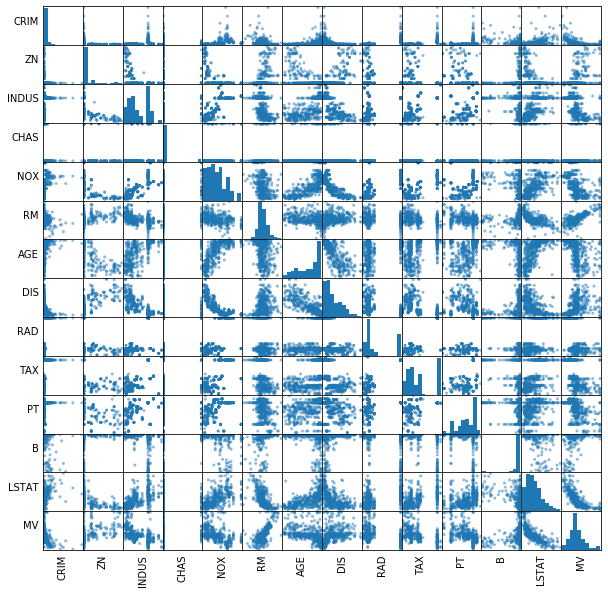

In [6]:
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [7]:
import six
for i in house_df.columns:
    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to MV for ", i, house_df.stat.corr('MV',i))

Correlation to MV for  CRIM -0.3883046116575088
Correlation to MV for  ZN 0.36044534463752903
Correlation to MV for  INDUS -0.48372517128143383
Correlation to MV for  CHAS 0.17526017775291847
Correlation to MV for  NOX -0.4273207763683772
Correlation to MV for  RM 0.695359937127267
Correlation to MV for  AGE -0.37695456714288667
Correlation to MV for  DIS 0.24992873873512172
Correlation to MV for  RAD -0.3816262315669168
Correlation to MV for  TAX -0.46853593528654536
Correlation to MV for  PT -0.5077867038116085
Correlation to MV for  B 0.3334608226834164
Correlation to MV for  LSTAT -0.7376627294671615
Correlation to MV for  MV 1.0


In [6]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT'], outputCol = 'features')
vhouse_df = vectorAssembler.transform(house_df)
vhouse_df = vhouse_df.select(['features', 'MV'])
vhouse_df.show(3)

+--------------------+-----------+
|            features|         MV|
+--------------------+-----------+
|[0.00632,18.0,2.3...|       24.0|
|[0.027310001,0.0,...|21.60000038|
|[0.02729,0.0,7.07...|34.70000076|
+--------------------+-----------+
only showing top 3 rows



In [7]:
vhouse_df.show()

+--------------------+-----------+
|            features|         MV|
+--------------------+-----------+
|[0.00632,18.0,2.3...|       24.0|
|[0.027310001,0.0,...|21.60000038|
|[0.02729,0.0,7.07...|34.70000076|
|[0.032370001,0.0,...|33.40000153|
|[0.069049999,0.0,...|36.20000076|
|[0.029850001,0.0,...|28.70000076|
|[0.088289998,12.5...|22.89999962|
|[0.144549996,12.5...|27.10000038|
|[0.211239994,12.5...|       16.5|
|[0.170039997,12.5...|18.89999962|
|[0.224889994,12.5...|       15.0|
|[0.117470004,12.5...|18.89999962|
|[0.093780003,12.5...|21.70000076|
|[0.629760027,0.0,...|20.39999962|
|[0.637960017,0.0,...|18.20000076|
|[0.627390027,0.0,...|19.89999962|
|[1.053930044,0.0,...|23.10000038|
|[0.784200013,0.0,...|       17.5|
|[0.802709997,0.0,...|20.20000076|
|[0.725799978,0.0,...|18.20000076|
+--------------------+-----------+
only showing top 20 rows



In [8]:
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [9]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='MV', maxIter=10, regParam=0.3, elasticNetParam=0.5)
lr_model = lr.fit(train_df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.03894844989395437,0.03708289604505195,-0.03663799791663145,2.4225704244355173,-8.945307127990473,3.4699003171385394,-0.0014853112367954116,-0.9813839077809434,0.02741620014526704,-0.0011188050958620705,-0.8600335188691558,0.009375037608186214,-0.4729951036865812]
Intercept: 28.07366314518168


In [10]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 4.526465
r2: 0.744707


In [11]:
train_df.describe().show()

+-------+------------------+
|summary|                MV|
+-------+------------------+
|  count|               334|
|   mean|22.239521015086822|
| stddev| 8.972028346646582|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



In [12]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","MV","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="MV",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
| 18.34830568658021|18.89999962|[0.0136,75.0,4.0,...|
| 38.71368314783555|       50.0|[0.01381,80.0,0.4...|
| 31.16140942291241|29.10000038|[0.01439,60.0,2.9...|
| 27.87253389566724|       24.5|[0.01501,80.0,2.0...|
|21.373660106352702|20.10000038|[0.019649999,80.0...|
+------------------+-----------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.674969


In [13]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 5.46873


In [14]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 11
objectiveHistory: [0.5, 0.42363893157013605, 0.21700198551325714, 0.1961648778350069, 0.16439763588105324, 0.16079239027300132, 0.15933311558475005, 0.158429368886108, 0.15784638829779085, 0.15762887351351293, 0.15760265313384345]
+-------------------+
|          residuals|
+-------------------+
| -6.450765154346264|
| 0.5461288852586286|
| -6.064281471415121|
| 1.7099020593928813|
|  5.126585840994469|
|-0.5566541964698466|
|  7.795764182209645|
|  8.369961251536708|
|  4.256865237861916|
| 1.2268843323003686|
| -3.320878108963285|
|  8.817266675521449|
|  9.901745299830381|
|-1.7268427955544432|
|  5.466493835380469|
|-0.6032726374425472|
| -8.769245175048606|
| -4.180883160625243|
|  4.863820286416868|
|-3.1798885681415676|
+-------------------+
only showing top 20 rows



In [15]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","MV","features").show()

+------------------+-----------+--------------------+
|        prediction|         MV|            features|
+------------------+-----------+--------------------+
| 18.34830568658021|18.89999962|[0.0136,75.0,4.0,...|
| 38.71368314783555|       50.0|[0.01381,80.0,0.4...|
| 31.16140942291241|29.10000038|[0.01439,60.0,2.9...|
| 27.87253389566724|       24.5|[0.01501,80.0,2.0...|
|21.373660106352702|20.10000038|[0.019649999,80.0...|
|30.195594148542718|30.79999924|[0.027629999,75.0...|
|27.253462231492982|       25.0|[0.028750001,28.0...|
|24.649358699226973|26.60000038|[0.02899,40.0,1.2...|
| 19.35188281108337|       18.5|[0.030409999,0.0,...|
| 20.03709277829807|       19.5|[0.03427,0.0,5.19...|
|25.526942776617727|24.79999924|[0.036589999,25.0...|
|  27.6759262616277|       28.0|[0.041129999,25.0...|
|27.083089402211233|22.89999962|[0.042029999,28.0...|
| 26.31281367836173|24.79999924|[0.042970002,52.5...|
|17.099511314950092|18.20000076|[0.04301,80.0,1.9...|
|26.321445478838267|23.89999

In [16]:
from pyspark.ml.linalg import Vectors

In [17]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

In [18]:
def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    # Important: asNondeterministic requires Spark 2.3 or later
    # It can be safely removed i.e.
    # return udf(to_array_, ArrayType(DoubleType()))(col)
    # but at the cost of decreased performance
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)

In [19]:
predictions.withColumn(
    "CRIM", to_array(col("features"))[0]).withColumn(
    "ZN", to_array(col("features"))[1]).withColumn(
    "INDUS", to_array(col("features"))[2]).show()

+--------------------+-----------+------------------+-----------+----+-----------+
|            features|         MV|        prediction|       CRIM|  ZN|      INDUS|
+--------------------+-----------+------------------+-----------+----+-----------+
|[0.0136,75.0,4.0,...|18.89999962| 18.34830568658021|     0.0136|75.0|        4.0|
|[0.01381,80.0,0.4...|       50.0| 38.71368314783555|    0.01381|80.0|0.460000008|
|[0.01439,60.0,2.9...|29.10000038| 31.16140942291241|    0.01439|60.0|2.930000067|
|[0.01501,80.0,2.0...|       24.5| 27.87253389566724|    0.01501|80.0| 2.00999999|
|[0.019649999,80.0...|20.10000038|21.373660106352702|0.019649999|80.0| 1.75999999|
|[0.027629999,75.0...|30.79999924|30.195594148542718|0.027629999|75.0|2.950000048|
|[0.028750001,28.0...|       25.0|27.253462231492982|0.028750001|28.0|15.03999996|
|[0.02899,40.0,1.2...|26.60000038|24.649358699226973|    0.02899|40.0|       1.25|
|[0.030409999,0.0,...|       18.5| 19.35188281108337|0.030409999| 0.0|5.190000057|
|[0.

In [30]:
predictions.withColumn("features", to_array(col("features"))).show()

+--------------------+-----------+------------------+
|            features|         MV|        prediction|
+--------------------+-----------+------------------+
|[0.01432, 100.0, ...|31.60000038|31.642298345630465|
|[0.01439, 60.0, 2...|29.10000038| 30.61597460856818|
|[0.0187, 85.0, 4....|23.10000038|26.089604518008795|
|[0.02055, 85.0, 0...|24.70000076| 25.87686337052318|
|[0.02187, 60.0, 2...|31.10000038| 31.54106591790108|
|[0.02729, 0.0, 7....|34.70000076|31.565634470993366|
|[0.027310001, 0.0...|21.60000038| 25.42531031410976|
|[0.030409999, 0.0...|       18.5| 19.45044005243805|
|[0.031500001, 95....|34.90000153|30.901013792604648|
|[0.033059999, 0.0...|20.60000038|21.790009557059754|
|[0.03427, 0.0, 5....|       19.5|19.951820767101093|
|[0.034449998, 82....|24.10000038|27.988572541249834|
|[0.03466, 35.0, 6...|19.39999962|23.909370126935066|
|[0.035100002, 95....|       48.5| 39.57263526789398|
|[0.03537, 34.0, 6...|       22.0| 27.99528435380784|
|[0.03551, 25.0, 4...|22.899

In [20]:
def extract(row):
    return (row.word, ) + tuple(row.vector.toArray().tolist())

In [23]:
predictions.rdd.map(extract).toDF(["prediction"]).show()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 53.0 failed 1 times, most recent failure: Lost task 0.0 in stage 53.0 (TID 54, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1527, in __getattr__
    idx = self.__fields__.index(item)
ValueError: 'word' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in main
    process()
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 367, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 390, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 1354, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-20-b57b5ec800f5>", line 2, in extract
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1532, in __getattr__
    raise AttributeError(item)
AttributeError: word

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:153)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1887)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1875)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1874)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1874)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2108)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2057)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2046)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1527, in __getattr__
    idx = self.__fields__.index(item)
ValueError: 'word' is not in list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 372, in main
    process()
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 367, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 390, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/rdd.py", line 1354, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/util.py", line 99, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-20-b57b5ec800f5>", line 2, in extract
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1532, in __getattr__
    raise AttributeError(item)
AttributeError: word

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:452)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:588)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:571)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:406)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:153)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:153)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2101)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [17]:
sc.stop()